In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
datas = pd.read_csv(r"C:\Users\Elanu\Desktop\bilkav.com_maaslar_yeni.csv")

In [3]:
print(datas)

    Calisan ID             unvan  UnvanSeviyesi  Kidem  Puan   maas
0            1             Cayci              1      5    70   2250
1            2          Sekreter              2      5    70   2500
2            3  Uzman Yardimcisi              3      5    70   3000
3            4             Uzman              4      5    70   4000
4            5  Proje Yoneticisi              5      5    70   5500
5            6               Sef              6      5    70   7500
6            7             Mudur              7      5    70  10000
7            8          Direktor              8      5    70  15000
8            9           C-level              9      5    70  25000
9           10               CEO             10      5    70  50000
10          11             Cayci              1      7    99   2000
11          12          Sekreter              2      7     9   2500
12          13  Uzman Yardimcisi              3      7    62   4000
13          14             Uzman              4 

In [8]:
df = pd.DataFrame(datas)
print(df.dtypes)

Calisan ID        int64
unvan            object
UnvanSeviyesi     int64
Kidem             int64
Puan              int64
maas              int64
dtype: object


In [23]:
print(df)
print(datas)


    Calisan ID             unvan  Kidem  Puan   maas
0            1             Cayci      5    70   2250
1            2          Sekreter      5    70   2500
2            3  Uzman Yardimcisi      5    70   3000
3            4             Uzman      5    70   4000
4            5  Proje Yoneticisi      5    70   5500
5            6               Sef      5    70   7500
6            7             Mudur      5    70  10000
7            8          Direktor      5    70  15000
8            9           C-level      5    70  25000
9           10               CEO      5    70  50000
10          11             Cayci      7    99   2000
11          12          Sekreter      7     9   2500
12          13  Uzman Yardimcisi      7    62   4000
13          14             Uzman      4    38   3000
14          15  Proje Yoneticisi      1    80   5000
15          16               Sef      2    35   5000
16          17             Mudur      8    99  12000
17          18          Direktor      4    58 

In [26]:
from sklearn.model_selection import train_test_split
X = df[['unvan', 'Kidem', 'Puan']]
Y = df['maas']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


Eğitim veri kümesi (X_train):
               unvan  Kidem  Puan
4   Proje Yoneticisi      5    70
16             Mudur      8    99
5                Sef      5    70
13             Uzman      4    38
11          Sekreter      7     9
22  Uzman Yardimcisi      8    50
1           Sekreter      5    70
2   Uzman Yardimcisi      5    70
25               Sef      1     2
3              Uzman      5    70
21          Sekreter      2    53
26             Mudur     10    81
18           C-level      2    20
29               CEO      9    83
20             Cayci      8    11
7           Direktor      5    70
10             Cayci      7    99
14  Proje Yoneticisi      1    80
19               CEO      4    42
6              Mudur      5    70
4      5500
16    12000
5      7500
13     3000
11     2500
22     2800
1      2500
2      3000
25     4000
3      4000
21     2200
26    12000
18    15000
29    60000
20     2200
7     15000
10     2000
14     5000
19    22000
6     10000
Name: maas, dtyp

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Verileri yükle
datas = pd.read_csv(r"C:\Users\Elanu\Desktop\bilkav.com_maaslar_yeni.csv")

# OneHotEncoder kullanarak kategorik sütunları dönüştür
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(datas[['unvan']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['unvan']))

# Dönüştürülen sütunları DataFrame'e ekleyin ve diğer sütunlarla birleştirin
df = pd.concat([X_encoded_df, datas[['Kidem', 'Puan']]], axis=1)
y = datas['maas']

# Verileri eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

# Lineer Regresyon modelini oluşturun ve eğitin
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = regressor.predict(X_test)
print("Linear Regression Tahminleri:", y_pred)

# Yeni verileri tahmin etmek için kullanın
new_data = {
    'unvan': ['CEO', 'Mudur'],
    'Kidem': [10, 10],
    'Puan': [100, 100]
}
new_df = pd.DataFrame(new_data)

# Yeni verileri OneHotEncoder ile dönüştürün ve modeli kullanarak tahmin yapın
X_new_encoded = encoder.transform(new_df[['unvan']]).toarray()
X_new_encoded_df = pd.DataFrame(X_new_encoded, columns=encoder.get_feature_names_out(['unvan']))
X_new = pd.concat([X_new_encoded_df, new_df[['Kidem', 'Puan']]], axis=1)

y_pred_new = regressor.predict(X_new)
print("Yeni Veri Tahminleri:", y_pred_new)


Linear Regression Tahminleri: [21221.62126142  3955.1456266  13994.7134555  12386.79004115
 23881.17334894 38977.28210072 15511.42045831 15275.16661729
  3909.02113017 -1085.20659302]
Yeni Veri Tahminleri: [49811.45302557 16587.66899777]


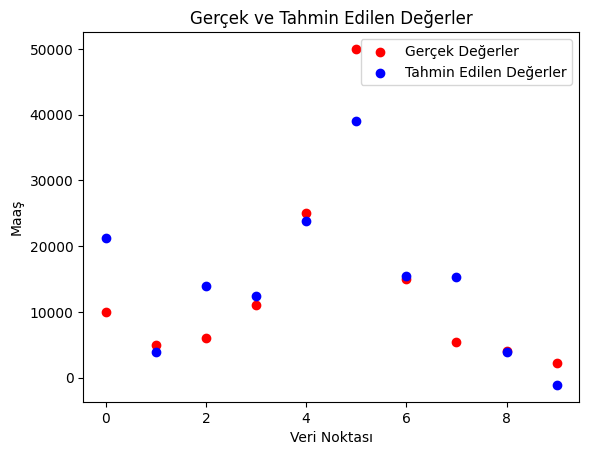

In [14]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test, color='red', label='Gerçek Değerler')

# Tahmin edilen değerler için scatter plot
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Tahmin Edilen Değerler')
plt.legend()
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Veri Noktası')
plt.ylabel('Maaş')
plt.show()


In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Verileri yükle
datas = pd.read_csv(r"C:\Users\Elanu\Desktop\bilkav.com_maaslar_yeni.csv")

# OneHotEncoder kullanarak kategorik sütunları dönüştür
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(datas[['unvan']]).toarray()

# Dönüştürülen kategorik sütunları DataFrame'e ekliyoruz
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['unvan']))

X = pd.concat([X_encoded_df, datas[['Kidem', 'Puan']]], axis=1)
y = datas['maas']

# Verileri eğitim ve test kümelerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Lineer Regresyon modelini oluşturma ve eğitme
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Eğitilen modeli kullanarak tahmin yapma
y_train_pred = regressor.predict(X_train_poly)
y_test_pred = regressor.predict(X_test_poly)


# Yeni verileri tahmin etmek için kullanın
new_data = {
    'unvan': ['CEO', 'Mudur'],
    'Kidem': [10, 10],
    'Puan': [100, 100]
}
new_df = pd.DataFrame(new_data)

# Yeni verileri OneHotEncoder ile dönüştürün ve modeli kullanarak tahmin yapın
X_new_encoded = encoder.transform(new_df[['unvan']]).toarray()
X_new_encoded_df = pd.DataFrame(X_new_encoded, columns=encoder.get_feature_names_out(['unvan']))
X_new = pd.concat([X_new_encoded_df, new_df[['Kidem', 'Puan']]], axis=1)

X_new_poly = poly_features.transform(X_new)
y_pred_new = regressor.predict(X_new_poly)
print("Yeni Veri Tahminleri:", y_pred_new)


Yeni Veri Tahminleri: [69901.72414907 14577.46467353]


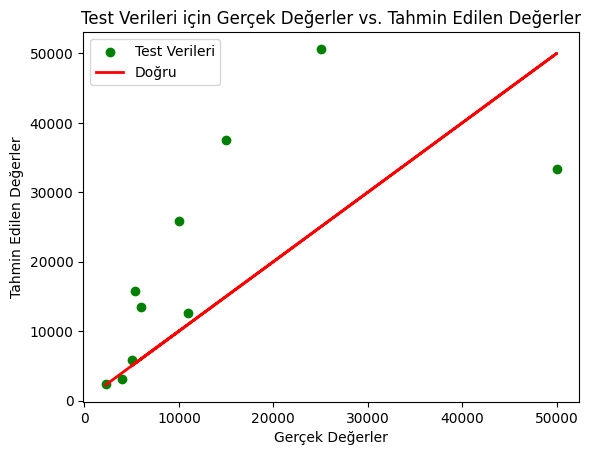

In [24]:
# Test verileri ile tahminleri görselleştirme
plt.scatter(y_test, y_test_pred, color='green', label='Test Verileri')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğru')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.title('Test Verileri için Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# SVR modelini oluşturma
svr_model = SVR(kernel='rbf')

# SVR modelini eğitme
svr_model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = svr_model.predict(X_test_scaled)

# Yeni verileri tahmin etmek için kullanın
new_data = {
    'unvan': ['CEO', 'Mudur'],
    'Kidem': [10, 10],
    'Puan': [100, 100]
}
new_df = pd.DataFrame(new_data)

# Yeni verileri OneHotEncoder ile dönüştürün ve modeli kullanarak tahmin yapın
X_new_encoded = encoder.transform(new_df[['unvan']]).toarray()
X_new_encoded_df = pd.DataFrame(X_new_encoded, columns=encoder.get_feature_names_out(['unvan']))
X_new = pd.concat([X_new_encoded_df, new_df[['Kidem', 'Puan']]], axis=1)


print("Yeni Veri Tahminleri:", y_pred)


Yeni Veri Tahminleri: [4500.67035744 4499.74706398 4499.12676353 4500.9770768  4500.7347179
 4501.46803853 4500.88892187 4501.17235678 4498.41178728 4498.77839962]


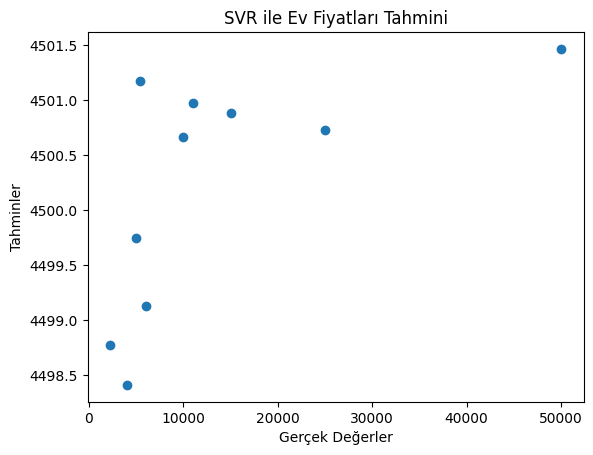

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("SVR ile Ev Fiyatları Tahmini")
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Decision Tree Regressor modelini eğitme
dt_regressor.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = dt_regressor.predict(X_test_scaled)

# Yeni verileri tahmin etmek için kullanın
new_data = {
    'unvan': ['CEO', 'Mudur'],
    'Kidem': [10, 10],
    'Puan': [100, 100]
}
new_df = pd.DataFrame(new_data)

# Yeni verileri OneHotEncoder ile dönüştürün ve modeli kullanarak tahmin yapın
X_new_encoded = encoder.transform(new_df[['unvan']]).toarray()
X_new_encoded_df = pd.DataFrame(X_new_encoded, columns=encoder.get_feature_names_out(['unvan']))
X_new = pd.concat([X_new_encoded_df, new_df[['Kidem', 'Puan']]], axis=1)


print("Yeni Veri Tahminleri:", y_pred)



Yeni Veri Tahminleri: [15000.  4000.  4000. 15000. 15000. 22000. 15000.  5500.  3000.  2000.]


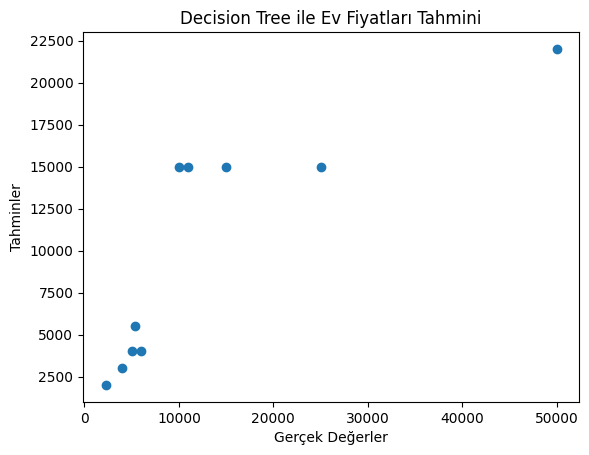

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Decision Tree ile Ev Fiyatları Tahmini")
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Random Forest Regressor modelini eğitme
rf_regressor.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = rf_regressor.predict(X_test)

# Yeni verileri tahmin etmek için kullanın
new_data = {
    'unvan': ['CEO', 'Mudur'],
    'Kidem': [10, 10],
    'Puan': [100, 100]
}
new_df = pd.DataFrame(new_data)

# Yeni verileri OneHotEncoder ile dönüştürün ve modeli kullanarak tahmin yapın
X_new_encoded = encoder.transform(new_df[['unvan']]).toarray()
X_new_encoded_df = pd.DataFrame(X_new_encoded, columns=encoder.get_feature_names_out(['unvan']))
X_new = pd.concat([X_new_encoded_df, new_df[['Kidem', 'Puan']]], axis=1)


print("Yeni Veri Tahminleri:", y_pred)



Yeni Veri Tahminleri: [21118.  5081. 20456. 10791. 10030. 28270. 10472. 16929.  3273.  3185.]


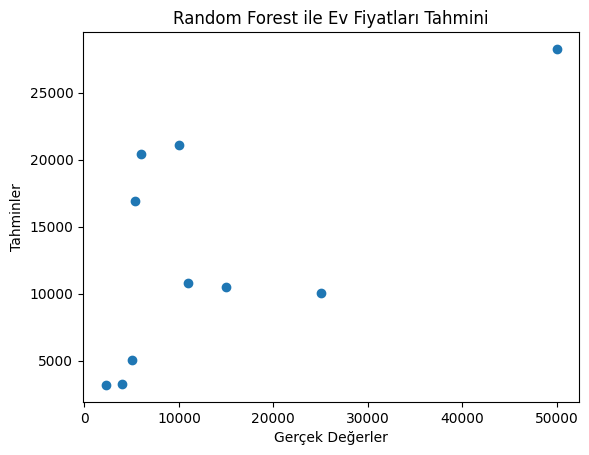

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Random Forest ile Ev Fiyatları Tahmini")
plt.show()